In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/titanic.csv')

In [3]:
df.sample(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S


In [4]:
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.") 

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


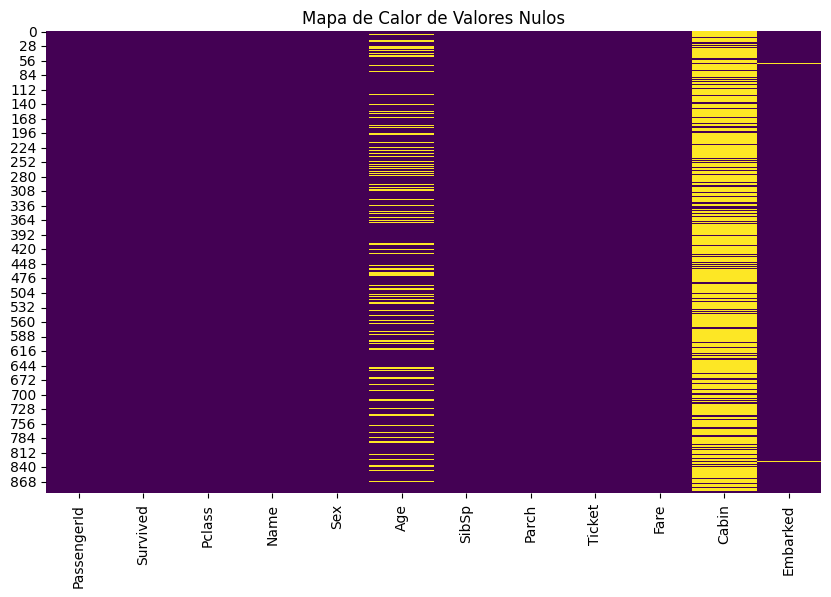

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu dataframe se llama 'df'
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos')

# Guardar el gráfico como un archivo PNG
plt.savefig('output.png', format='png')

# Mostrar el gráfico
plt.show()

In [6]:
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


/tmp/ipykernel_6580/4247461437.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


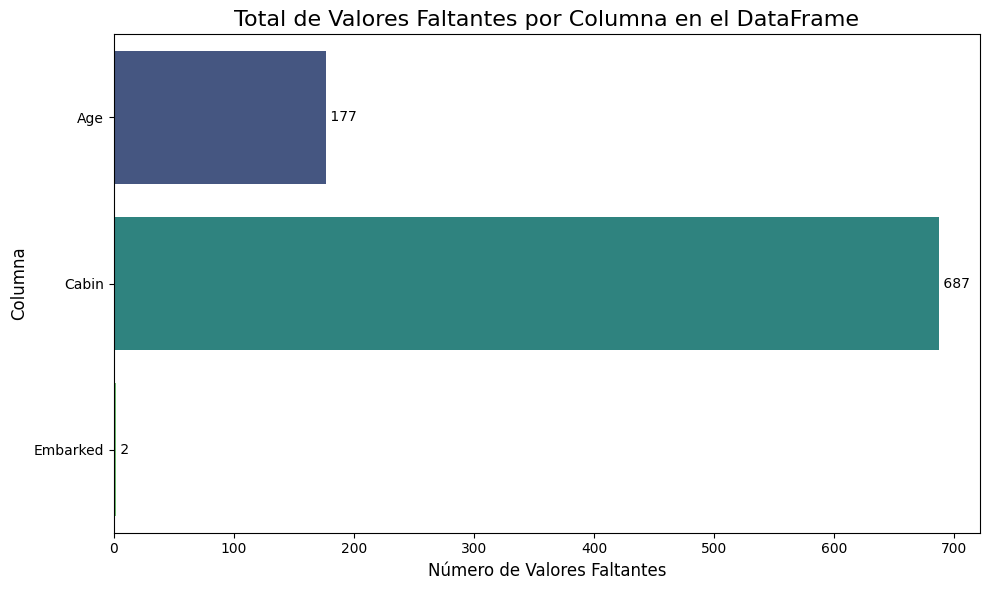

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular los valores faltantes
# Cuenta el número de valores faltantes (NaN) por columna
missing_values = df.isnull().sum()

# Filtra las columnas que tienen al menos un valor faltante
# para que el gráfico sea más legible y relevante
missing_values = missing_values[missing_values > 0]

# 2. Verificar si hay valores faltantes para graficar
if missing_values.empty:
    print("¡El DataFrame no tiene valores faltantes!")
else:
    # 3. Preparar los datos para el gráfico
    # Convierte la Serie en un DataFrame para un mejor manejo en seaborn/matplotlib
    missing_df = missing_values.reset_index()
    missing_df.columns = ['Columna', 'Valores Faltantes']

    # 4. Crear el gráfico con seaborn
    plt.figure(figsize=(10, 6)) # Define el tamaño de la figura

    # Crea el gráfico de barras. 'x' para el conteo y 'y' para los nombres de las columnas.
    sns.barplot(
        x='Valores Faltantes',
        y='Columna',
        data=missing_df,
        palette='viridis' # Elige una paleta de colores
    )

    # 5. Añadir título y etiquetas
    plt.title('Total de Valores Faltantes por Columna en el DataFrame', fontsize=16)
    plt.xlabel('Número de Valores Faltantes', fontsize=12)
    plt.ylabel('Columna', fontsize=12)

    # Opcional: Añadir el conteo de valores faltantes en las barras
    for index, row in missing_df.iterrows():
        plt.text(row['Valores Faltantes'], index, f' {row["Valores Faltantes"]}', va='center')

    # Ajustar el diseño para evitar que las etiquetas se corten
    plt.tight_layout()

    # 6. Mostrar el gráfico
    plt.show()

In [8]:
df.drop('Cabin', axis = 1, inplace = True)

In [9]:
# Calcular la mediana de la columna Age
median_age = df['Age'].median()

# Imputar los valores nulos con la mediana
df['Age'].fillna(median_age, inplace=True)

/tmp/ipykernel_6580/686027435.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [15]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [16]:
df.to_csv('./data/titanic_clean.csv', index=False)